<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/pyvital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pyvital
In this example, we will learn how to handle Vital files derived from VitalRecorder using Python programming language.

## Preparation

###Download sample vital files
Download sample vital files from vitaldb using the command below.

In [ ]:
!wget https://vitaldb.net/samples.zip
!unzip samples.zip

--2022-06-25 19:59:13--  https://vitaldb.net/samples.zip
Resolving vitaldb.net (vitaldb.net)... 15.197.255.47
Connecting to vitaldb.net (vitaldb.net)|15.197.255.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137243688 (131M) [application/zip]
Saving to: ‘samples.zip’

samples.zip         100%[===================>] 130.89M  69.2MB/s    in 1.9s    

2022-06-25 19:59:16 (69.2 MB/s) - ‘samples.zip’ saved [137243688/137243688]

Archive:  samples.zip
  inflating: 1-1.vital               
  inflating: 1-2.vital               
  inflating: 1.vital                 
  inflating: 2.vital                 
  inflating: 3.vital                 
  inflating: 4.vital                 
  inflating: 5.vital                 


### Download 'vitaldb' library
Intall `vitaldb` library in order to read Vital files.

In [ ]:
!pip install vitaldb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


import `vitaldb` library to read vital file.

In [ ]:
import vitaldb

## Functional API
The functional API provides easy functions for reading a track list (`vital_trks`) and contents (`vital_recs`) from vital file.

###Read a track list from vital file
You can read a track list from vital file using `vital_trks` function.

In [ ]:
trks = vitaldb.vital_trks('00001.vital')
trks

['/EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar 8000M/HR',
 'Solar 8000M/ST_I',
 'Solar 8000M/ST_II',
 'Solar 8000M/ST_III',
 'Solar 8000M/ST_AVL',
 'Solar 8000M/ST_AVR',
 'Solar 8000M/ST_AVF',
 'Solar 8000M/ART_MBP',
 'Solar 8000M/ART_SBP',
 'Solar 8000M/ART_DBP',
 'Solar 8000M/PLETH_SPO2',
 'Solar 8000M/PLETH_HR',
 'Solar 8000M/BT',
 'Solar 8000M/VENT_MAWP',
 'Solar 8000M/ST_V5',
 'Solar 8000M/NIBP_MBP',
 'Solar 8000M/NIBP_SBP',
 'Solar 8000M/NIBP_DBP',
 'Solar 8000M/VENT_PIP',
 'Solar 8000M/VENT_RR',
 'Solar 8000M/VENT_MV',
 'Solar 8000M/VENT_TV',
 'Solar 8000M/VENT_PPLAT',
 'Solar 8000M/GAS2_AGENT',
 'Solar 8000M/GAS2_EXPIRED',
 'Solar 8000M/GAS2_INSPIRED',
 'Solar 8000M/ETCO2',
 'Solar 8000M/INCO2',
 'Solar 8000M/RR_CO2',
 'Solar 8000M/FEO2',
 'Solar 8000M/FIO2',
 'Solar 8000M/VENT_INSP_TM',
 'Solar 8000M/VENT_SET_TV',
 'Solar 8000M/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Pr

### Read a content of vital file
You can read a content of vital file using `vital_recs` function.

In [ ]:
vals = vitaldb.vital_recs('00001.vital', ['ECG_II','ART'], 1/100)
vals

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ -0.09797144, -20.65918   ],
       [ -0.06834793,  32.663483  ],
       [  0.45500422,  -4.8598633 ]], dtype=float32)

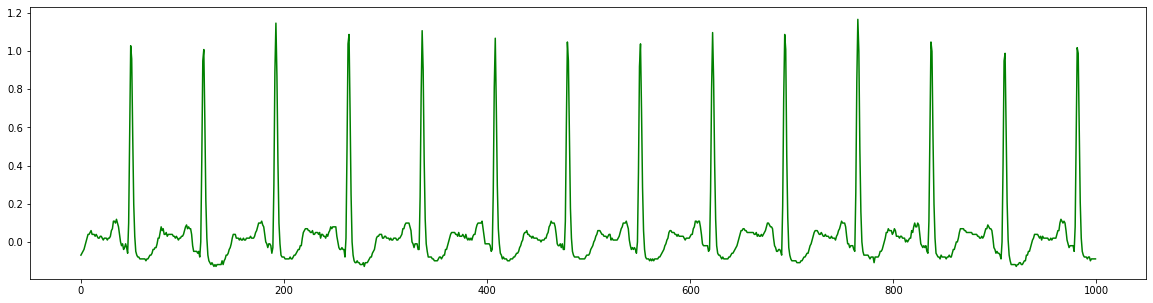

In [ ]:
import matplotlib.pyplot as plt

# plot a waveform for ECG_II
ecg = vals[:,0]
plt.figure(figsize=(20,5))
plt.plot(ecg[110000:111000], color='g')
plt.show()

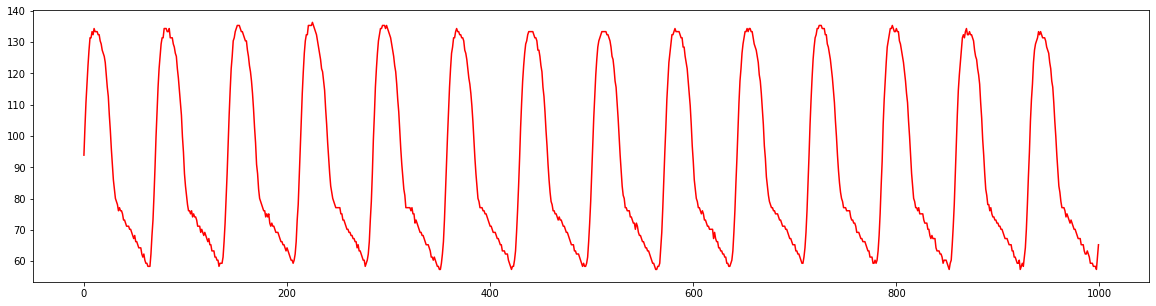

In [ ]:
# Plot a waveform for ART
art = vals[:,1]
plt.figure(figsize=(20,5))
plt.plot(art[110000:111000], color='r')
plt.show()

## Object-oriented API
The object-oriented API provides an object called `VitalFile` which can read, crop, write, and convert vital file.

### Create VitalFile object
You can create `VitalFile` object by opening one / list of local / online vital file(s).

In [ ]:
vf = vitaldb.VitalFile('1.vital')

### Read information from the VitalFile object

All information such as track list and measured samples are in the `vf` object. For example, you can get a list of track names using the `vf.get_track_names()` method or `vf.trks.keys()`.

In [ ]:
vf.get_track_names()

['EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar 8000M/HR',
 'Solar 8000M/ST_I',
 'Solar 8000M/ST_II',
 'Solar 8000M/ST_III',
 'Solar 8000M/ST_AVL',
 'Solar 8000M/ST_AVR',
 'Solar 8000M/ST_AVF',
 'Solar 8000M/ART_MBP',
 'Solar 8000M/ART_SBP',
 'Solar 8000M/ART_DBP',
 'Solar 8000M/PLETH_SPO2',
 'Solar 8000M/PLETH_HR',
 'Solar 8000M/BT',
 'Solar 8000M/VENT_MAWP',
 'Solar 8000M/ST_V5',
 'Solar 8000M/NIBP_MBP',
 'Solar 8000M/NIBP_SBP',
 'Solar 8000M/NIBP_DBP',
 'Solar 8000M/VENT_PIP',
 'Solar 8000M/VENT_RR',
 'Solar 8000M/VENT_MV',
 'Solar 8000M/VENT_TV',
 'Solar 8000M/VENT_PPLAT',
 'Solar 8000M/GAS2_AGENT',
 'Solar 8000M/GAS2_EXPIRED',
 'Solar 8000M/GAS2_INSPIRED',
 'Solar 8000M/ETCO2',
 'Solar 8000M/INCO2',
 'Solar 8000M/RR_CO2',
 'Solar 8000M/FEO2',
 'Solar 8000M/FIO2',
 'Solar 8000M/VENT_INSP_TM',
 'Solar 8000M/VENT_SET_TV',
 'Solar 8000M/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Pri

You can read the samples using `to_numpy()` method which will give you the same results with `vitaldb.vital_recs()`.

In [ ]:
vf.to_numpy(['ECG_II','ART'], 1/100)

array([[         nan,          nan],
       [         nan,          nan],
       [         nan,          nan],
       ...,
       [ -0.09797144, -20.65918   ],
       [ -0.06834793,  32.663483  ],
       [  0.45500422,  -4.8598633 ]], dtype=float32)

You can even convert the tracks to the pandas DataFrame with `to_pandas()` method.

In [ ]:
df = vf.to_pandas(['ECG_II', 'ART'], 1/100)
df.to_csv('1.csv', index=False, encoding='utf-8-sig')
df

,ECG_II,ART
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1154205,-0.413958,5.014709
1154206,0.366133,4.027252
1154207,-0.097971,-20.659180
1154208,-0.068348,32.663483


### Save the VitalFile object to vital file
To save `VitalFile` object to vital file, call `to_vital()` with the file path to save.

In [ ]:
vf.to_vital('1_copyed.vital')

True

### Batch extraction of tracks
You can extract tracks of several vital files in the specific folder using the `vitaldb` python library.

In [ ]:
import os
IDIR = '.'
TRACK_NAMES = ['ECG_II', 'ART']
for filename in os.listdir(IDIR):
    if filename.endswith('.vital'):
        print('Converting:' + filename, end='...', flush=True)
        vf = vitaldb.VitalFile(IDIR + '/' + filename, TRACK_NAMES)
        vf.to_pandas(TRACK_NAMES, 1/100).to_csv(filename + '.csv', index=False, encoding='utf-8-sig')
        print('done')

Converting:1-1.vital...done
Converting:2.vital...done
Converting:3.vital...done
Converting:00001.vital...done
Converting:1.vital...done
Converting:1-2.vital...done
Converting:4.vital...done
Converting:1_copyed.vital...done
Converting:5.vital...done


## Platform API
You can login, list, and download vital files from the VitalDB platform using the `vitaldb` Platform API.

In [ ]:
# path to save downloaded files
import os
DOWNLOAD_DIR = "download"
if not os.path.exists(DOWNLOAD_DIR):
    os.mkdir(DOWNLOAD_DIR)

if vitaldb.api.login(id="vitaldb_test", pw="vitaldb_test"):
    for file in vitaldb.api.filelist(None, '2021-10-01'):
        print("Downloading: " + file['filename'], end='...', flush=True)
        vitaldb.api.download(file['filename'], DOWNLOAD_DIR + '/' + file['filename'])
        print('done')
else:
    print('login error')

Downloading: TEST1_211020_142621.vital...done
Downloading: TEST2_211019_102621.vital...done
Downloading: TEST2_211020_101124.vital...done


You can read the vital file directly from the server by not specifing the file path to the `vitaldb.api.download` method.

In [ ]:
vitaldb.api.login(id="vitaldb_test", pw="vitaldb_test")
filename = vitaldb.api.filelist()[0]['filename']
vf = vitaldb.VitalFile(vitaldb.api.download(filename))
vf.get_track_names()

['EVENT',
 'SNUADC/ART',
 'SNUADC/ECG_II',
 'SNUADC/ECG_V5',
 'SNUADC/PLETH',
 'Solar8000/HR',
 'Solar8000/ST_I',
 'Solar8000/ST_II',
 'Solar8000/ST_III',
 'Solar8000/ST_AVL',
 'Solar8000/ST_AVR',
 'Solar8000/ST_AVF',
 'Solar8000/ART_MBP',
 'Solar8000/ART_SBP',
 'Solar8000/ART_DBP',
 'Solar8000/PLETH_SPO2',
 'Solar8000/PLETH_HR',
 'Solar8000/BT',
 'Solar8000/VENT_MAWP',
 'Solar8000/ST_V5',
 'Solar8000/NIBP_MBP',
 'Solar8000/NIBP_SBP',
 'Solar8000/NIBP_DBP',
 'Solar8000/VENT_PIP',
 'Solar8000/VENT_RR',
 'Solar8000/VENT_MV',
 'Solar8000/VENT_TV',
 'Solar8000/VENT_PPLAT',
 'Solar8000/GAS2_AGENT',
 'Solar8000/GAS2_EXPIRED',
 'Solar8000/GAS2_INSPIRED',
 'Solar8000/ETCO2',
 'Solar8000/INCO2',
 'Solar8000/RR_CO2',
 'Solar8000/FEO2',
 'Solar8000/FIO2',
 'Solar8000/VENT_INSP_TM',
 'Solar8000/VENT_SET_TV',
 'Solar8000/VENT_SET_PCP',
 'Primus/CO2',
 'Primus/AWP',
 'Primus/INSP_SEVO',
 'Primus/EXP_SEVO',
 'Primus/PAMB_MBAR',
 'Primus/MAWP_MBAR',
 'Primus/MAC',
 'Primus/VENT_LEAK',
 'Primus/INCO2',

For the intranet server, you can pass the host name and port number to the `vitaldb.api.login` method.

In [ ]:
vitaldb.api.login(id='admin', pw='pass', host='snuh.vitaldb.net', port=80)